# What is Linear Regression?

### Linear regression is a model which predicts proportionality between dependent and independent variables.

<img src='img/1.png'>

In [1]:
!pip install statsmodels

# Problem Statement

### Predict House Prices using Statsmodels

## Import Libraries

In [2]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

sns.set_style('darkgrid')

In [3]:
ls dataset/

Ecommerce Customers*    gdp.csv                 shiller.csv
USA_Housing.csv*        ginzberg.csv            unemployment-macro.csv
economics.csv           monthly-hpi.csv
fed_funds.csv           seasons.csv


In [4]:
housing_price_index = pd.read_csv('dataset/monthly-hpi.csv')
unemployment = pd.read_csv('dataset/unemployment-macro.csv')
federal_funds_rate = pd.read_csv('dataset/fed_funds.csv')
shiller = pd.read_csv('dataset/shiller.csv')
gross_domestic_product = pd.read_csv('dataset/gdp.csv')

Data Source : https://fred.stlouisfed.org/series/USSTHPI

In [5]:
housing_price_index.head()

date  housing_price_index
0  2010-11-01               186.07
1  2010-12-01               183.27
2  2011-01-01               181.35
3  2011-02-01               179.66
4  2011-03-01               178.84

In [6]:
unemployment.head()

date  total_unemployed  more_than_15_weeks  \
0  2010-11-01              16.9                8696   
1  2010-12-01              16.6                8549   
2  2011-01-01              16.2                8393   
3  2011-02-01              16.0                8175   
4  2011-03-01              15.9                8166   

   not_in_labor_searched_for_work  multi_jobs  leavers  losers  
0                            2531        6708      5.7    63.0  
1                            2609        6899      6.4    61.2  
2                            2800        6816      6.5    60.1  
3                            2730        6741      6.4    60.2  
4                            2434        6735      6.4    60.3

In [7]:
gross_domestic_product.head()

date  total_expenditures  labor_force_pr  producer_price_index  \
0  2011-01-01              5766.7            64.2                 192.7   
1  2011-04-01              5870.8            64.2                 203.1   
2  2011-07-01              5802.6            64.0                 204.6   
3  2011-10-01              5812.9            64.1                 201.1   
4  2012-01-01              5765.7            63.7                 200.7   

   gross_domestic_product  
0                 14881.3  
1                 14989.6  
2                 15021.1  
3                 15190.3  
4                 15291.0

In [8]:
df = (shiller.merge(housing_price_index,on='date')
      .merge(gross_domestic_product,on='date')
      .merge(unemployment,on='date')
      .merge(federal_funds_rate,on='date'))

df.head()

date    sp500  consumer_price_index  long_interest_rate  \
0  2011-01-01  1282.62                220.22                3.39   
1  2011-04-01  1331.51                224.91                3.46   
2  2011-07-01  1325.19                225.92                3.00   
3  2011-10-01  1207.22                226.42                2.15   
4  2012-01-01  1300.58                226.66                1.97   

   housing_price_index  total_expenditures  labor_force_pr  \
0               181.35              5766.7            64.2   
1               180.80              5870.8            64.2   
2               184.25              5802.6            64.0   
3               181.51              5812.9            64.1   
4               179.13              5765.7            63.7   

   producer_price_index  gross_domestic_product  total_unemployed  \
0                 192.7                 14881.3              16.2   
1                 203.1                 14989.6              16.1   
2                 204.6                 15021.1              15.9   
3                 201.1                 15190.3              15.8   
4                 200.7                 15291.0              15.2   

   more_than_15_weeks  not_in_labor_searched_for_work  multi_jobs  leavers  \
0                8393                            2800        6816      6.5   
1                8016                            2466        6823      6.8   
2                8177                            2785        6850      6.8   
3                7802                            2555        6917      8.0   
4                7433                            2809        7022      7.4   

   losers  federal_funds_rate  
0    60.1                0.17  
1    59.4                0.10  
2    59.2                0.07  
3    57.9                0.07  
4    57.1                0.08

In [9]:
df.columns

Index(['date', 'sp500', 'consumer_price_index', 'long_interest_rate',
       'housing_price_index', 'total_expenditures', 'labor_force_pr',
       'producer_price_index', 'gross_domestic_product', 'total_unemployed',
       'more_than_15_weeks', 'not_in_labor_searched_for_work', 'multi_jobs',
       'leavers', 'losers', 'federal_funds_rate'],
      dtype='object')

### Target Variable : Housing_price_index 

* housing_price_index - measure of change of price of house (https://fred.stlouisfed.org/series/USSTHPI)


* date - date column


* gross_domestic_product - monetary indicator - when gdp will increase, housing price index will also increase (https://fred.stlouisfed.org/series/GDP)


* total_expenditures - Total US government spending - when this will increase, hpi will also increase


* producer price index - another price index related to production - when this increases, then hpi increases


* total_unemployed - when this increases, hpi decreases

#### Exploratory Data Analysis

We'll skip EDA for sake of brevity

# Ordinary Least Squares

OLS measures accuracy of a linear model.

#### OLS or Linear regression is based on certain assumptions which need to be followed in order to get the correct conclusion.

### Assumptions

* Linearity : There is linear relationship between feature and target variables.


* No Multicollinearity : Predictor / Feature variables are not collinear. i.e. they're not highly correlated.


* Zero Conditional Mean : Average distance between observations and the trend line / best fit line is zero.


* Homoskedasticity : No pattern in residuals/errors or variance is constant.


* No autocorrelation : A variable is not correlated to itself in a shifted space.

#### Using statsmodels OLS we'll create our model setting housing_price_index as a function of total_unemployed.

In [10]:
housing_model = ols("housing_price_index ~ total_unemployed",data=df).fit()

In [12]:
housing_model_summary = housing_model.summary()

In [13]:
housing_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Fri, 15 May 2020   Prob (F-statistic):           2.71e-15
Time:                         22:15:20   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of the housing_price_summary

* **Adj. R-Squared** is 0.949 which means that 95% of housing prices can be explained by our variables.



* **Regression Coefficients (coef)** : Representing the change in dependent variable wrt 1 unit change in the independent variable



* **Standard Error (std err)** : Accuracy of the total_unemployed coefficient  by estimating the variation in the coefficient if it were run on the different sample. std err for total_unemployed is 0.41 which is low, leaning towards good accuracy.



* **p-value** : 0 for total_unemployed and also for intercept
    * variables are significant
    * if p value is <0.05 then variables are significant



* confidence interval : 0.025	0.975
    * Range within which our confidence is likely to fall.
    * We can be 95% confident that our total_unemployed coefficient will fall between -9.185 & -7.480.

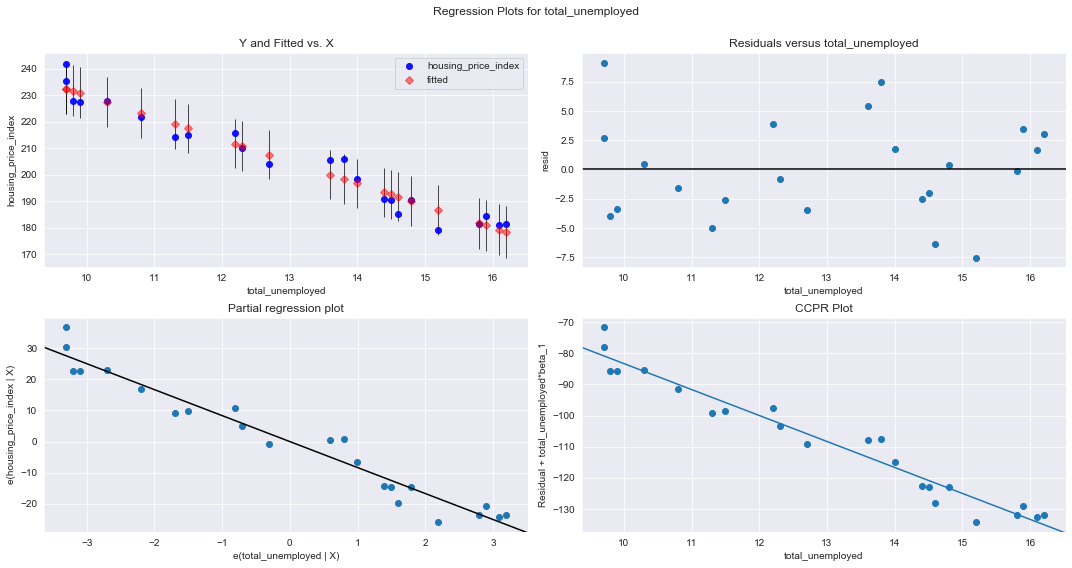

In [15]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(housing_model,'total_unemployed',fig=fig)

## Multiple Linear Regression

In [19]:
housing_model2 = ols("""housing_price_index ~ total_unemployed
                                              + long_interest_rate
                                              + federal_funds_rate
                                              + consumer_price_index
                                              + gross_domestic_product
                     """,data=df).fit()

housing_model2_summary = housing_model2.summary()

In [21]:
housing_model2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     168.5
Date:                 Fri, 15 May 2020   Prob (F-statistic):           7.32e-14
Time:                         22:50:06   Log-Likelihood:                -55.164
No. Observations:                   23   AIC:                             122.3
Df Residuals:                       17   BIC:                             129.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -389.2234    187.252     -2.079      0.053    -784.291       5.844
total_unemployed          -0.1727      2.399     -0.072      0.943      -5.234       4.889
long_interest_rate         5.4326      1.524      3.564      0.002       2.216       8.649
federal_funds_rate        32.3750      9.231      3.507      0.003      12.898      51.852
consumer_price_index       0.7785      0.360      2.164      0.045       0.020       1.537
gross_domestic_product     0.0252      0.010      2.472      0.024       0.004       0.047
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.043
Skew:                          -0.271   Prob(JB):                        0.594
Kurtosis:                       2.109   Cond. No.                     4.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

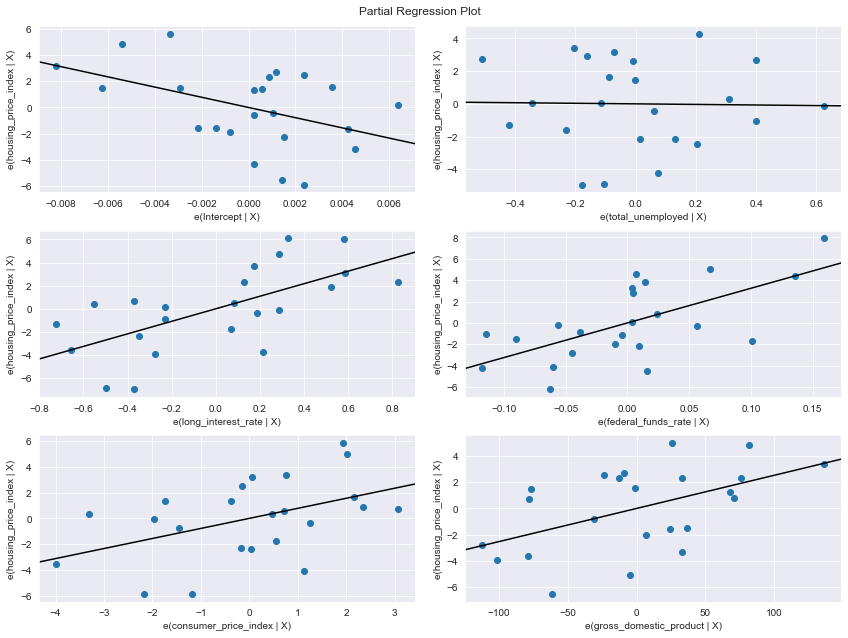

In [22]:
fig = plt.figure(figsize=(12,9))

fig = sm.graphics.plot_partregress_grid(housing_model2,fig=fig)

# Great Job!